In [2]:
from jinja2 import Template

In [1]:
cars = [
    {'model': 'Ауди', 'price': 23000},
    {'model': 'Шкода', 'price': 17300},
    {'model': 'Вольво', 'price': 44300},
    {'model': 'Фольксваген', 'price': 21300}
]

In [3]:
tp1 = "Total cars price {{ cs | sum(attribute='price') }}"
tm = Template(source=tp1)
msg = tm.render(cs=cars)
msg

'Total cars price 105900'

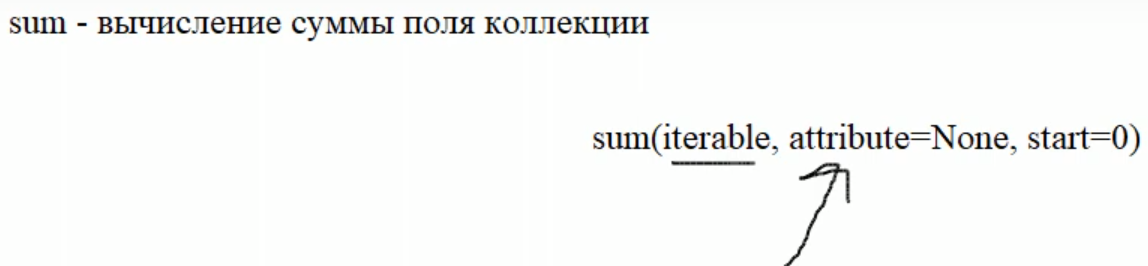

In [6]:
digits = [1, 2, 3, 4, 5]
tm2 = Template("Numbers sum: {{ numbers | sum }}")
result = tm2.render(numbers=digits)
result

'Numbers sum: 15'

### Фильтры Jinja2
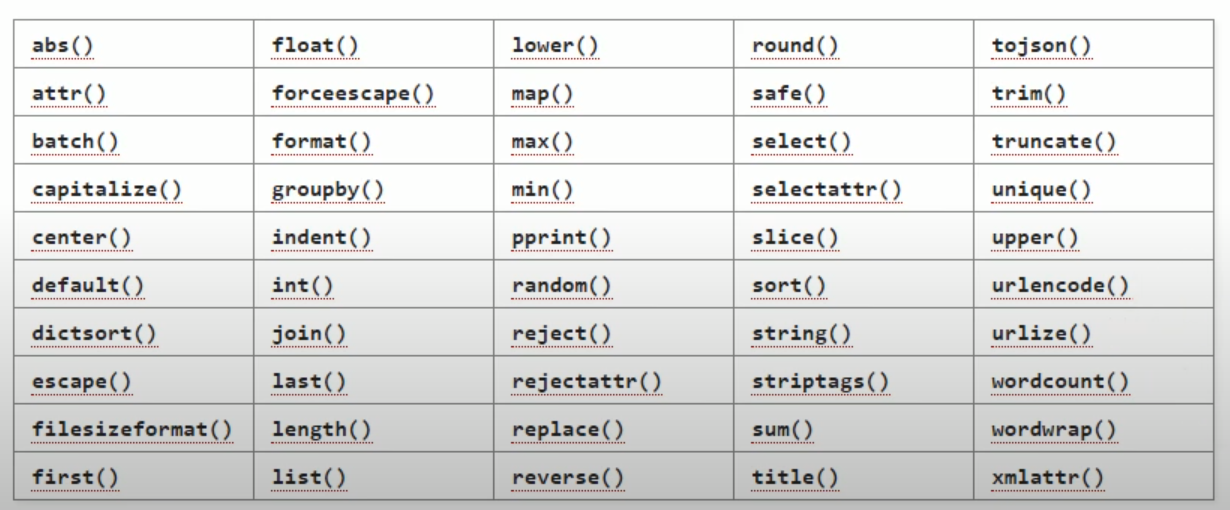

In [11]:
tm3 = Template(source="Max price of the cars is {{ exp_car | max(attribute='price') }}")
result = tm3.render(exp_car=cars)
result

"Max price of the cars is {'model': 'Вольво', 'price': 44300}"

In [14]:
tm3 = Template(source="Max price of the most expensive car is {{ (exp_car | max(attribute='price')).price }}")
result = tm3.render(exp_car=cars)
result

'Max price of the most expensive car is 44300'

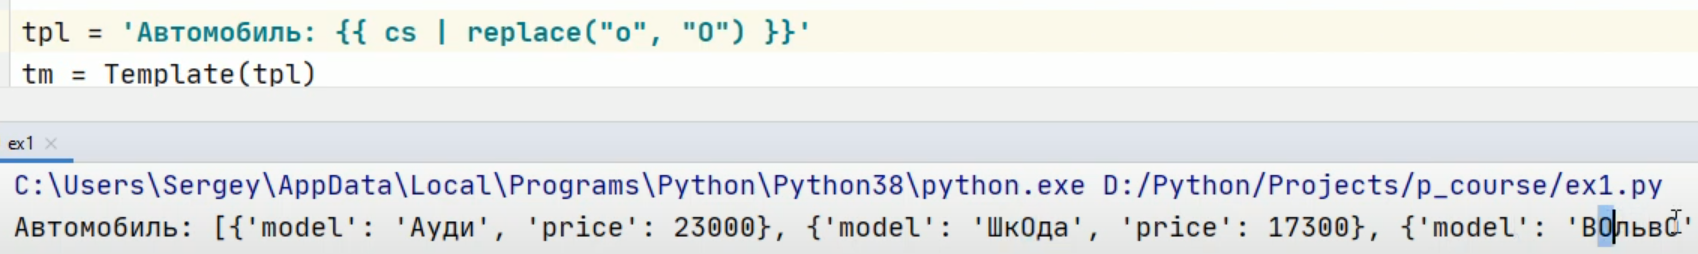

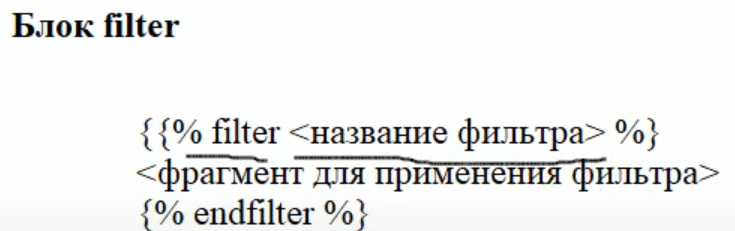

In [15]:
persons = [
    {"name": "Алексей", "old": 18, "weight": 78.5},
    {"name": "Николай", "old": 28, "weight": 82.3},
    {"name": "Иван", "old": 33, "weight": 94.0}
]

In [16]:
tpl = """
{%- for u in users -%}
{% filter upper %}{{u.name}}{% endfilter %}
{% endfor -%}
"""

In [22]:
tm = Template(tpl)
msg = tm.render(users=persons)
print(msg)

АЛЕКСЕЙ
НИКОЛАЙ
ИВАН



In [27]:
tmp = """
{%- for car in cars -%}
{% filter lower %}{{ car.model }}{% endfilter %}
{% endfor -%}
"""

In [28]:
tm = Template(tmp)
result = tm.render(cars=cars)
result

'ауди\nшкода\nвольво\nфольксваген\n'

In [29]:
print(result)

ауди
шкода
вольво
фольксваген



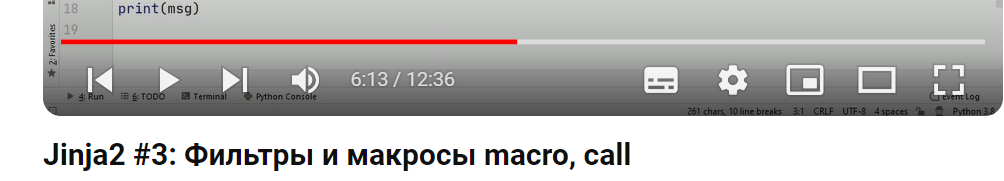